In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/croprec1/croprec.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

try:
    df = pd.read_csv("/kaggle/input/croprec1/croprec.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: croprec.csv not found.")
    exit()

Data loaded successfully.


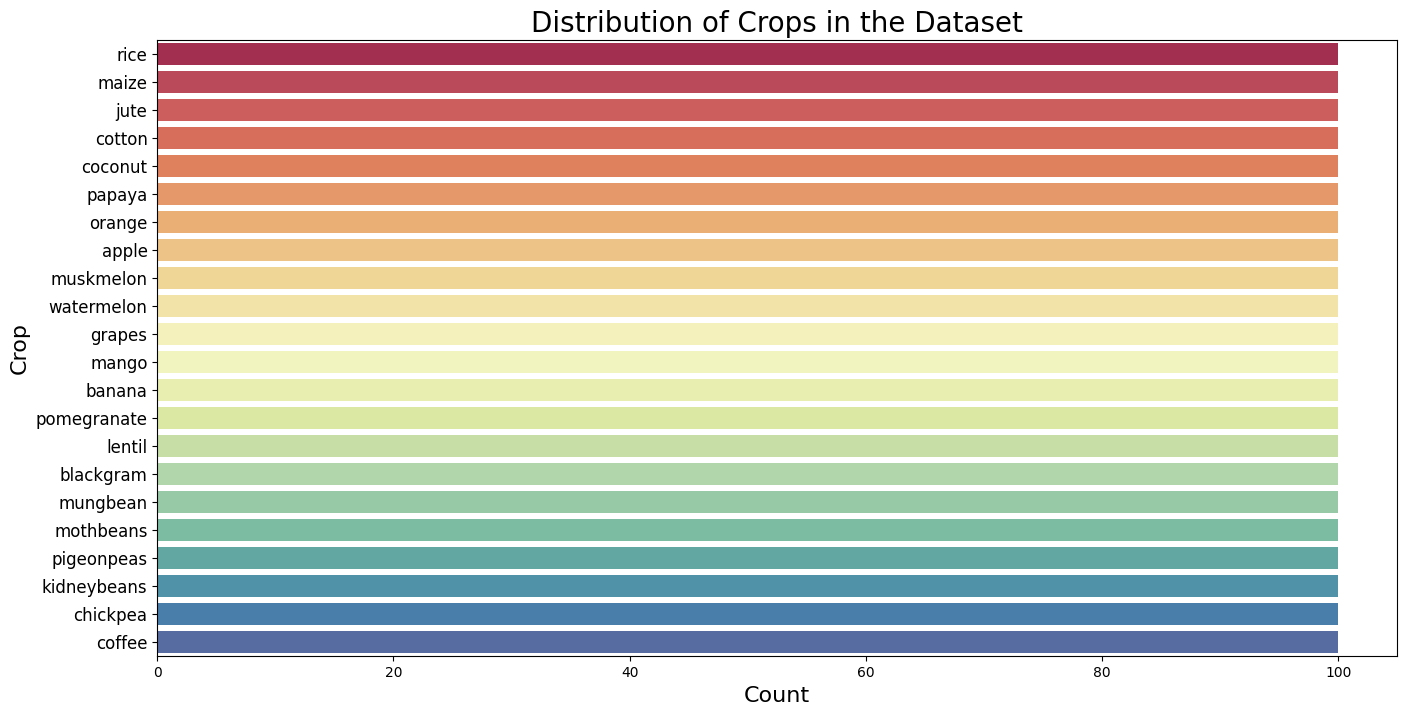

In [6]:
plt.figure(figsize=(16, 8))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='Spectral')
plt.title('Distribution of Crops in the Dataset', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Crop', fontsize=16)
plt.yticks(fontsize=12)
plt.savefig('1_crop_distribution.png', bbox_inches='tight')


Analyzing climate requirements (Temperature, Humidity, Rainfall)...


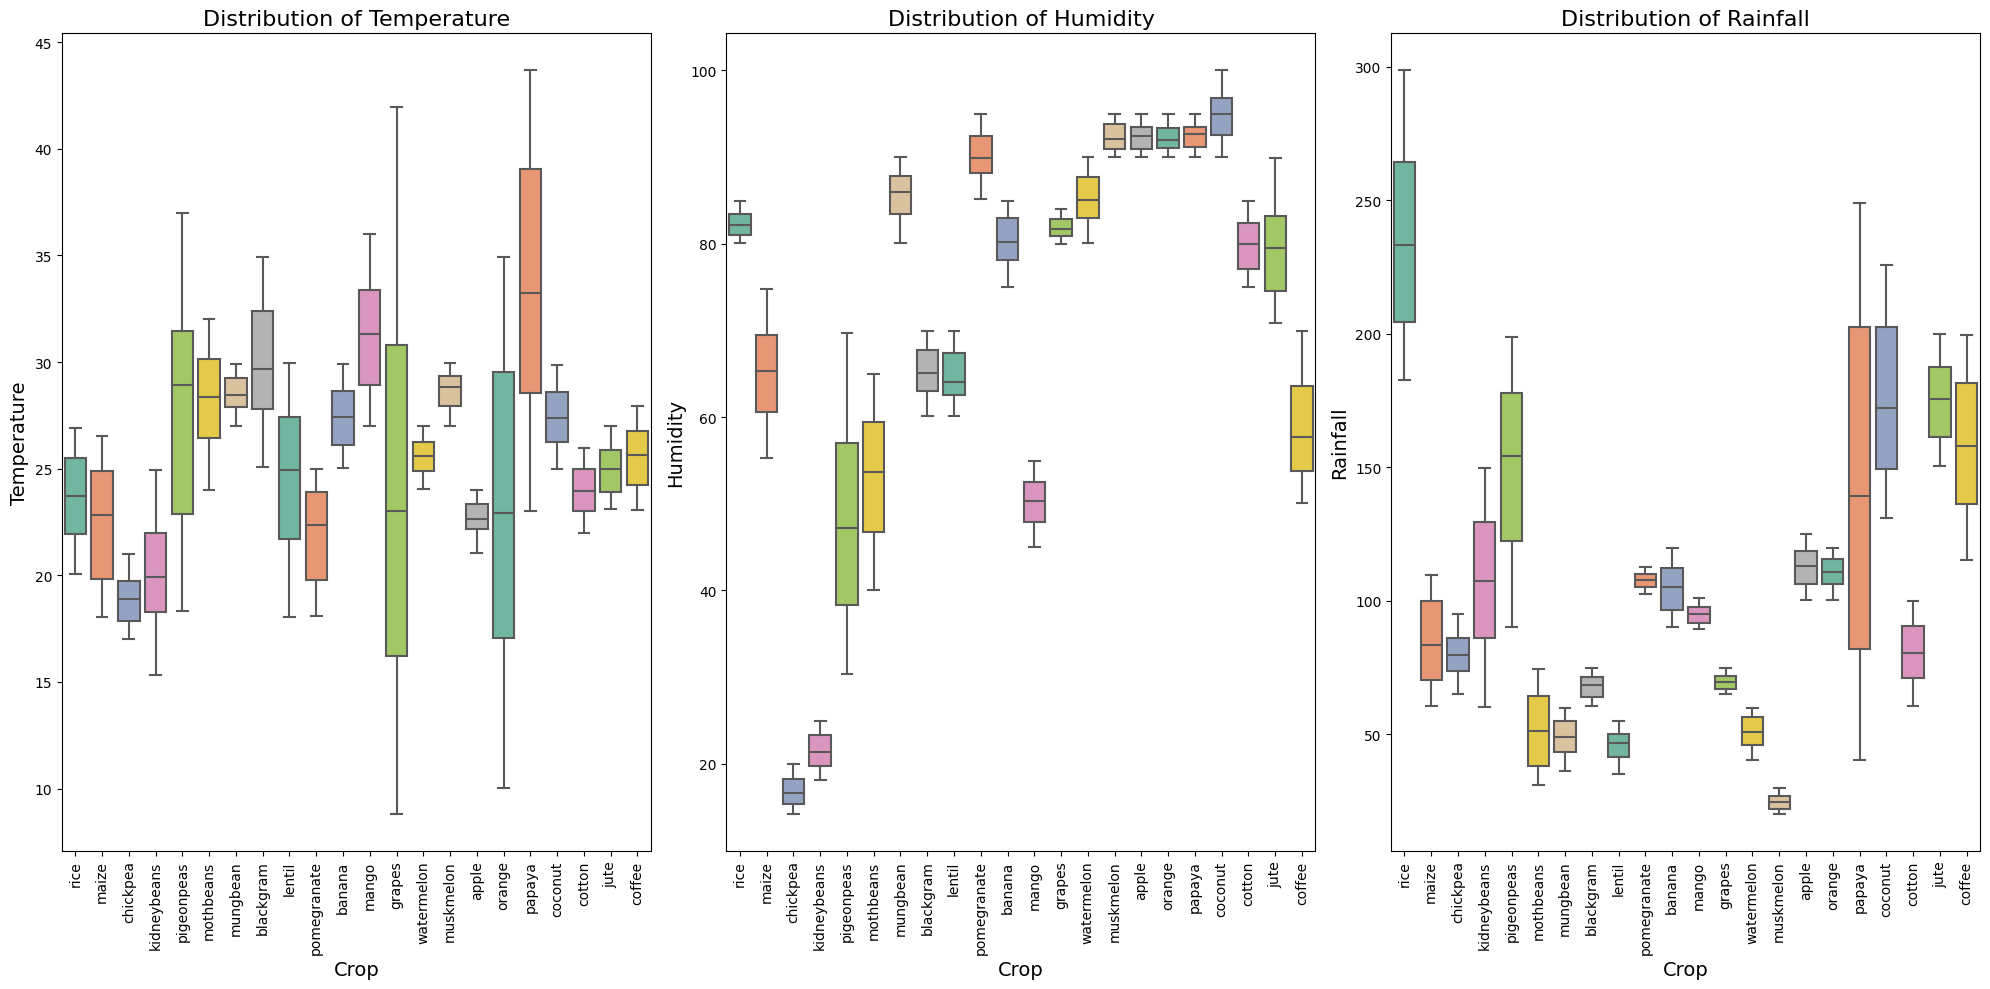

In [7]:
print("\nAnalyzing climate requirements (Temperature, Humidity, Rainfall)...")
features = ['temperature', 'humidity', 'rainfall']
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='label', y=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=16)
    plt.xlabel('Crop', fontsize=14)
    plt.ylabel(feature.capitalize(), fontsize=14)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('2_climate_analysis.png', bbox_inches='tight')


Analyzing soil requirements (N, P, K, pH)...


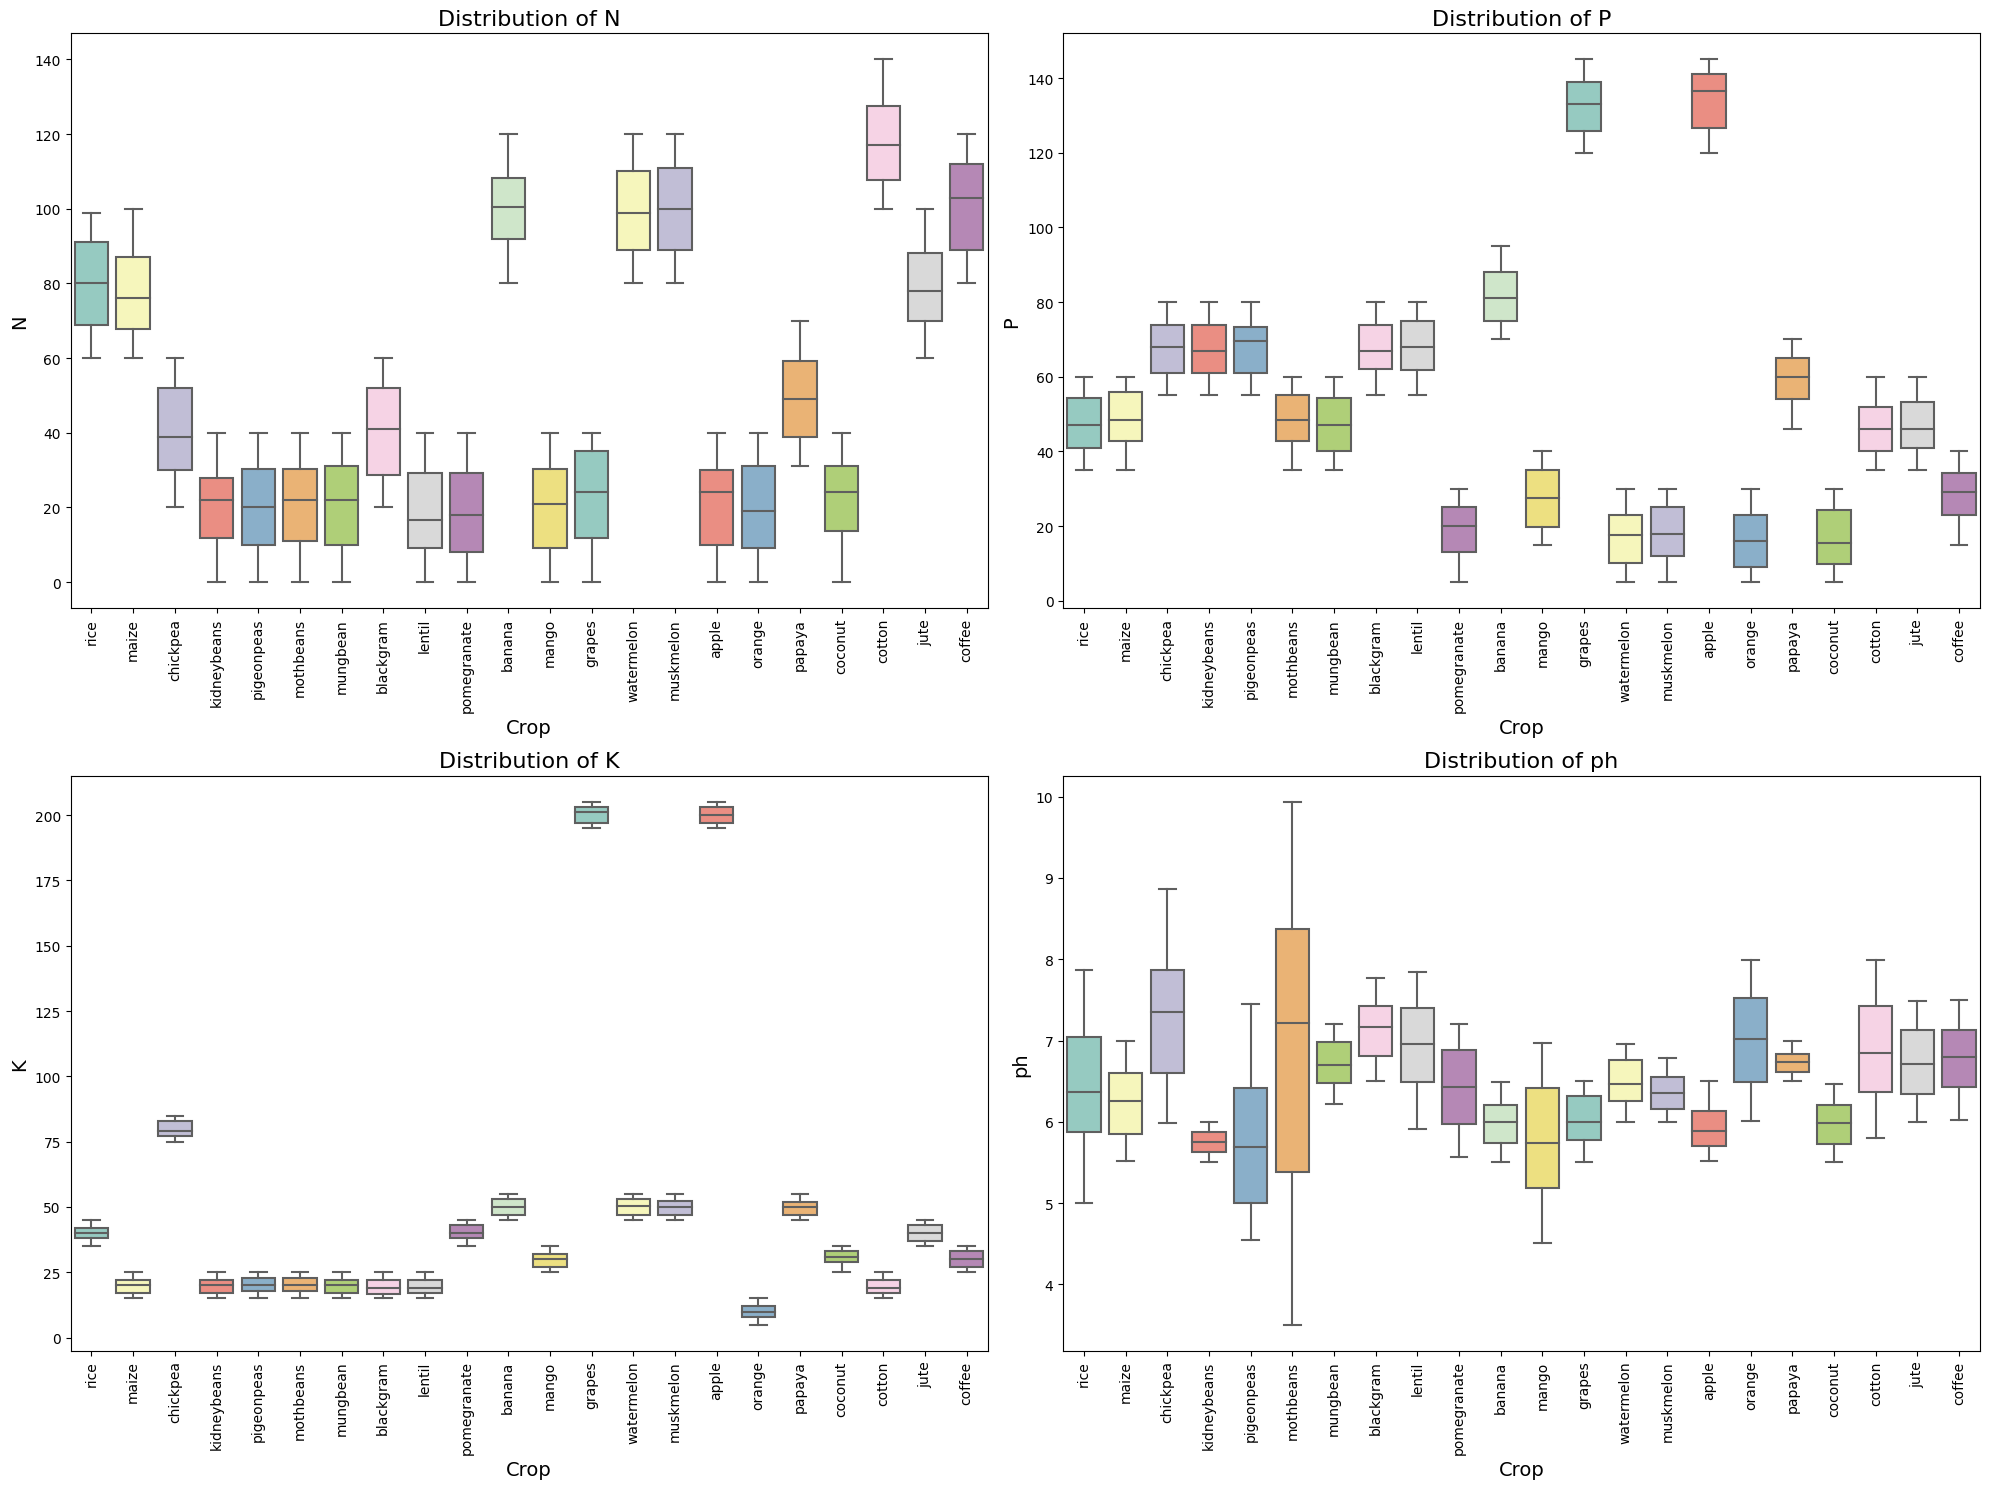

In [8]:
print("\nAnalyzing soil requirements (N, P, K, pH)...")
soil_features = ['N', 'P', 'K', 'ph']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(soil_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='label', y=feature, data=df, palette='Set3')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel('Crop', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('3_soil_analysis.png', bbox_inches='tight')

In [10]:
print("\nPreprocessing data...")
X = df.drop('label', axis=1)
y = df['label']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


Preprocessing data...


In [11]:
print("\nTraining and comparing models...")
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy * 100:.2f}%")


Training and comparing models...
Training Logistic Regression...
Accuracy for Logistic Regression: 97.27%
Training K-Nearest Neighbors...
Accuracy for K-Nearest Neighbors: 97.95%
Training Random Forest...
Accuracy for Random Forest: 99.55%


In [12]:
best_model_name = max(results, key=results.get)
best_model_instance = models[best_model_name]
best_accuracy = results[best_model_name]

print(f"\nBest model is {best_model_name} with {best_accuracy * 100:.2f}% accuracy.")
joblib.dump(best_model_instance, 'crop_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'label_encoder.pkl')
print("Best model, scaler, and encoder have been saved to .pkl files.")


Best model is Random Forest with 99.55% accuracy.
Best model, scaler, and encoder have been saved to .pkl files.



Generating model comparison plot...


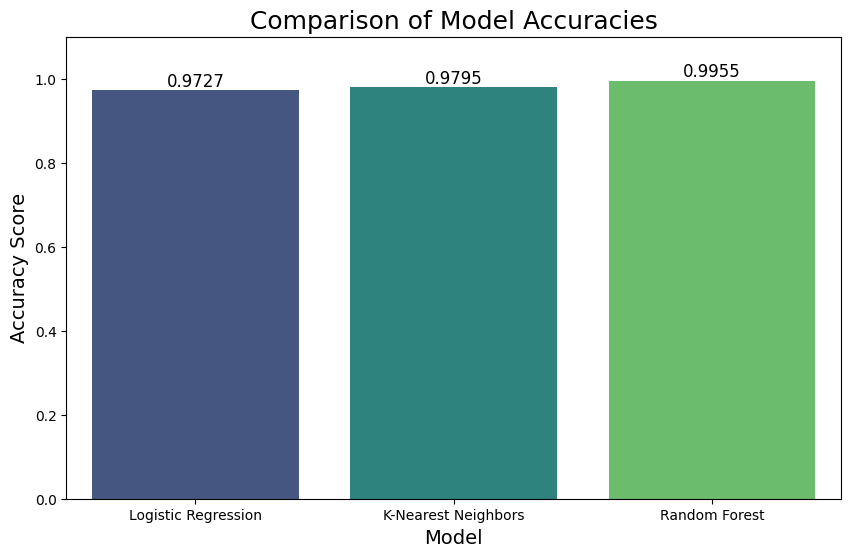

In [13]:
print("\nGenerating model comparison plot...")
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0, 1.1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontsize=12)
plt.savefig('4_model_comparison.png', bbox_inches='tight')